In [510]:
import importlib
import utils
import transformers
import model
import losses

In [511]:
from model import *
from utils import *

In [512]:
importlib.reload(utils)
importlib.reload(transformers)
importlib.reload(model)
importlib.reload(losses)

<module 'losses' from 'd:\\Documents\\machinelearning\\cgm-paper\\src\\losses.py'>

In [513]:
print("Current working directory: ", os.getcwd())

Current working directory:  d:\Documents\machinelearning\cgm-paper\src


In [514]:
raw_dir = "../data/raw"
tuning_dir = "../data/tuning"

In [515]:
assert os.path.exists(raw_dir), "Raw data directory not found"
assert os.path.exists(tuning_dir), "Tuning data directory not found"

In [516]:
dataset = load_data(raw_dir)

Found 22 files in ../data/raw
train (139415, 47)
test (32912, 47)


In [517]:
val_dataset = load_data(tuning_dir)

Found 2 files in ../data/tuning
train (13630, 43)
test (3002, 43)


In [518]:
for key in dataset.keys():
    val_dataset[key] = reduce_classes(val_dataset[key])
    dataset[key] = reduce_classes(dataset[key])

In [519]:
dataset.get("train")['Time'].isnull().sum()

0

In [520]:
train_data = get_train_dataset(dataset['train'])
test_data = get_any_dataset(dataset['test'], dataset['train'])

      CGM  month  day  hour  minute  weekday  year  cgm_velo  change  \
24  129.0      5   19    13      35        2  2027  0.003333     1.0   
25  127.0      5   19    13      40        2  2027  0.000000     0.0   
26  124.0      5   19    13      45        2  2027 -0.006667    -2.0   
27  123.0      5   19    13      50        2  2027 -0.010000    -3.0   
28  124.0      5   19    13      55        2  2027 -0.003333    -1.0   

    upper_band  ...  extreme_CGM_80  extreme_CGM_85  extreme_CGM_90  \
24  198.092207  ...               0               0               0   
25  198.840303  ...               0               0               0   
26  198.288080  ...               0               0               0   
27  196.078435  ...               0               0               0   
28  192.197842  ...               0               0               0   

    extreme_CGM_95  wCGM(1)     wCGM(2)     wCGM(3)  wCGM(4)     wCGM(5)  \
24               0    129.0  128.333333  127.666667    127.8  12

The tuning data will be merged with the training data and be fitted into the pipeline to be used for the validation data

In [521]:
tuning_data = get_tuning_dataset(val_dataset['train'], dataset['train'])
val_data = get_any_dataset(val_dataset['test'], tuning_data)

In [522]:
trainX, trainY = train_data.drop(["CGM"], axis = 1), train_data["CGM"]
trainX.shape, trainY.shape

((120010, 20), (120010,))

In [523]:
testX, testY = test_data.drop(["CGM"], axis = 1), test_data["CGM"]
testX.shape, testY.shape

((26845, 20), (26845,))

In [524]:
model = HybridModel()
model.fit(trainX, trainY, testX, testY, eval = True, tune = False)

Base fitted with columns: Index(['month', 'day', 'hour', 'minute', 'weekday', 'year', 'cgm_velo',
       'change', 'upper_band', 'lower_band', 'extreme_CGM_80',
       'extreme_CGM_85', 'extreme_CGM_90', 'extreme_CGM_95', 'wCGM(1)',
       'wCGM(2)', 'wCGM(3)', 'wCGM(4)', 'wCGM(5)', 'wCGM(6)', 'direction'],
      dtype='object')
Base: (16.233021131639433, 4.029022354323619, 0.07677582651024074)
Base + Residuals: (16.147939518751404, 4.018449890038621, 0.07643201608935095) Change: 4.291430039246293%


In [525]:
model.forecast(testX, 6, return_X = False)

array([146.79486788, 144.56750329, 142.82233378, 141.54134457,
       140.71347688, 140.54449046])

<Axes: >

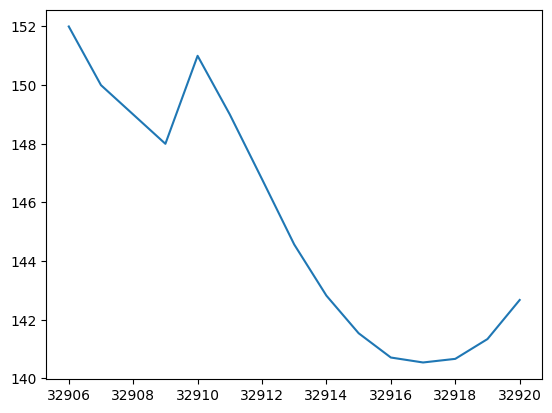

In [526]:
model.forecast(testX, 9).tail(15)['wCGM(1)'].plot()

<Axes: >

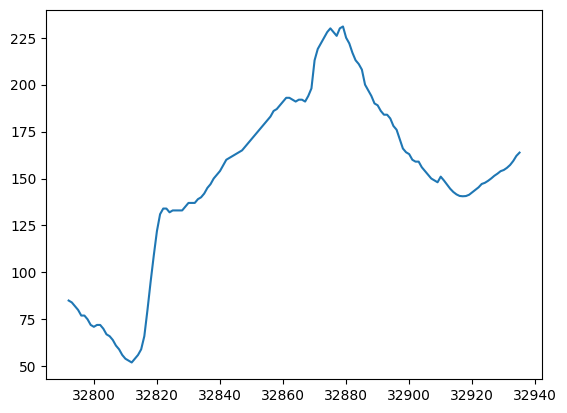

In [529]:
model.forecast(testX, 24).tail(12 *  12)['wCGM(1)'].plot()